In [25]:
import torch
import torch.nn as nn
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from matplotlib.pylab import plt

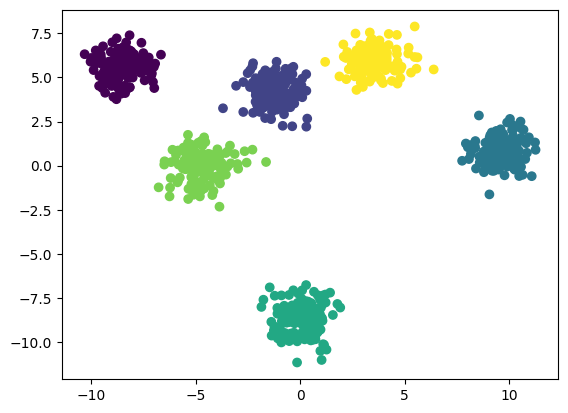

In [26]:
X, y = make_blobs(n_samples=1000, centers=6, n_features=2, cluster_std=0.8, random_state=7)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train)
plt.show()
X_train = torch.from_numpy(X_train).float()
X_test = torch.from_numpy(X_test).float()
y_train = torch.from_numpy(y_train).long()
y_test =torch.from_numpy(y_test ).long()

In [27]:
class classifier(nn.Module):
    def __init__(self, input_features, output_features, hidden_features):
        super().__init__()
        self.linear = nn.Linear(input_features, hidden_features)
        self.linear2 = nn.Linear(hidden_features,hidden_features)
        self.linear3 = nn.Linear(hidden_features, hidden_features)
        self.linear4 = nn.Linear(hidden_features, output_features)
        self.reLU= nn.ReLU()
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return  self.linear4(self.reLU(self.linear3(self.reLU(self.linear2(self.reLU(self.linear(x)))))))

In [28]:
model = classifier(2, 6, 16)
model

classifier(
  (linear): Linear(in_features=2, out_features=16, bias=True)
  (linear2): Linear(in_features=16, out_features=16, bias=True)
  (linear3): Linear(in_features=16, out_features=16, bias=True)
  (linear4): Linear(in_features=16, out_features=6, bias=True)
  (reLU): ReLU()
)

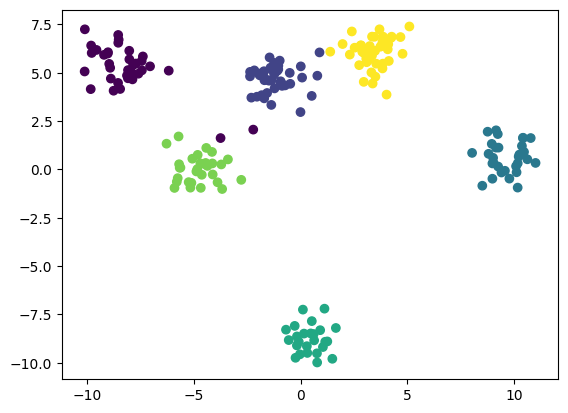

In [37]:
model.eval()
with torch.inference_mode():
    predictions = model(X_test)
    predictions = torch.round(predictions)
    plt.scatter(X_test[:, 0], X_test[:, 1], c=torch.argmax(predictions, dim=1) )
    plt.show()

In [30]:
def trainer(epochs,model, loss_fn, optimizer, X_train, y_train):
    for epoch in range(epochs):
        model.train()
        predictions = model(X_train)
        loss = loss_fn(predictions, y_train)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        if epoch % 100 == 0:
            print(f"{epoch} {loss}")

In [35]:
LEARNING_RATE = 0.01

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=LEARNING_RATE)
trainer(epochs=4000, model=model, loss_fn=loss_fn, optimizer=optimizer, X_train=X_train, y_train=y_train)

0 0.004547016229480505
100 0.004518391098827124
200 0.0044902414083480835
300 0.004462557844817638
400 0.004435334354639053
500 0.0044085439294576645
600 0.004382178653031588
700 0.004356224089860916
800 0.004330678377300501
900 0.004305507987737656
1000 0.0042807236313819885
1100 0.00425630621612072
1200 0.004232249688357115
1300 0.004208531696349382
1400 0.004185153171420097
1500 0.00416210014373064
1600 0.00413935910910368
1700 0.0041169230826199055
1800 0.004094796255230904
1900 0.004072960466146469
2000 0.004051407799124718
2100 0.004030133597552776
2200 0.004009132739156485
2300 0.003988388925790787
2400 0.003967911470681429
2500 0.003947705961763859
2600 0.003927748650312424
2700 0.003908026963472366
2800 0.003888537175953388
2900 0.0038692683447152376
3000 0.003850222798064351
3100 0.003831399604678154
3200 0.003812785493209958
3300 0.00379437324590981
3400 0.0037761712446808815
3500 0.0037581538781523705
3600 0.003740333952009678
3700 0.0037227028515189886
3800 0.0037052549887